# Linear Regression With Time Series
https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series

#### Objectives:
- engineer features to model the major time series components (trends, seasons, and cycles)
- visualize time seires with many kinds of *time series plots*,
- create forecasting *hybrids* that combine the strengths of complementary models
- adapt machine learning methods to a variety of forecasting tasks

### What is a Time Series? 

**Time Series**: a set of observations recorded over time. In forecasting applications, the observations are typically recorded with a regular frequency - daily or monthly

In [7]:
import pandas as pd

df = pd.read_csv("./input/ts-course-data/book_sales.csv", 
                 index_col = 'Date', 
                 parse_dates = ['Date'],
).drop('Paperback', axis=1)

df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


The series records the number of hardcover book sales at a retail store over 30 days. 

### Linear Regression with Time Series

The **linear regression** algorithm learns how to make a weighted sum from its input features. For two features:
`target = weight_1 * feature_1 + weight_2 * feature_2 + bias`

During training, the regression algorithm learns values for the parameters `weight_1`, `weight_2`, and `bias` that best fit the `target`. The algorithm is often called *ordinary least squares*. The weights are also called *regression coefficients* and the `bias` is also called the *intercept* because its where it crosses the graph.

#### Time-step features

Two kinds of features unique to time series:
- time-step features
- lag features

**Time-step features* are features that can be derived directly from the time index. Most basic is **time dummy**, which counts off time steps in the series from the beginning to end. 


In [9]:
import numpy as np 

df['Time'] = np.arange(len(df.index))

df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


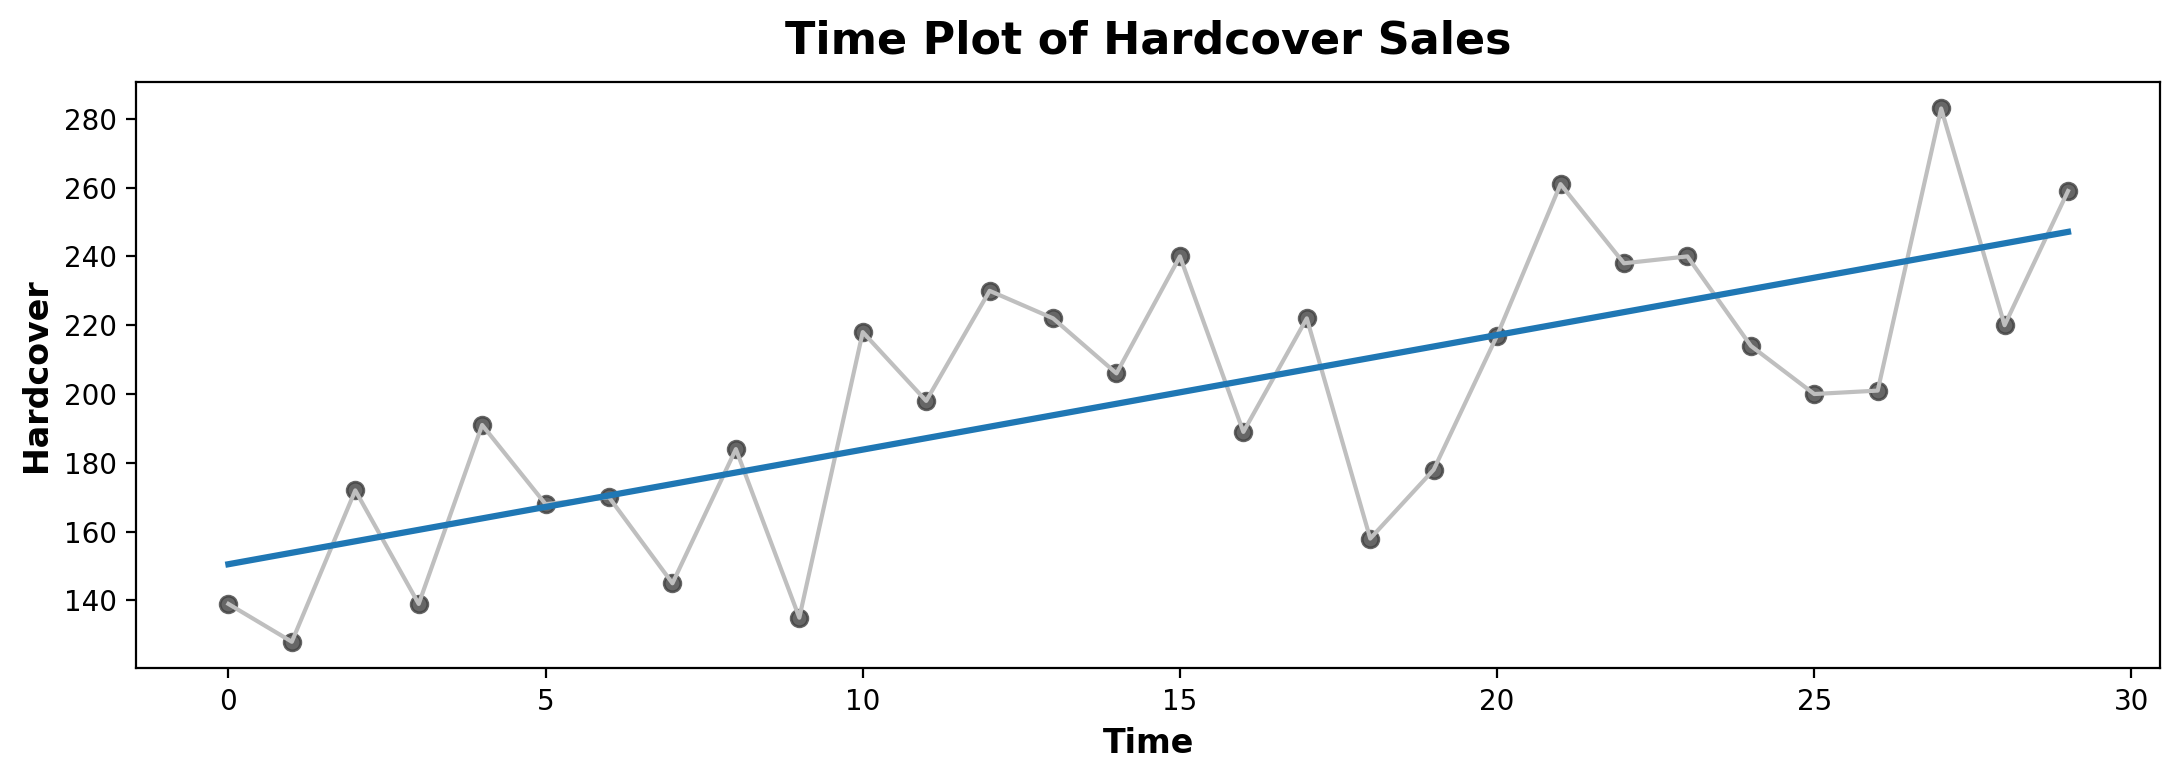

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');